In [138]:
import pymc as pm
import arviz as az
import pandas as pd
import pymc as pm
import sys
from sklearn.model_selection import train_test_split

sys.path.append('../')

In [139]:
df = pd.read_csv('../data/processed/ProcessedTweets.csv')

In [140]:
X_train, X_test, y_train, y_test = train_test_split(df[['hour_sin', 'hour_cos']], df['airline_sentiment_confidence'], test_size=0.2)

In [141]:
with pm.Model() as model:
    alpha = pm.Normal('Intercept', mu=0, sigma=10)
    hour_sin_coeff = pm.Normal('hour_sin_coeff', mu=0, sigma=10)
    hour_cos_coeff = pm.Normal('hour_cos_coeff', mu=0, sigma=10)
    sigma = pm.HalfNormal('sigma', sigma=1)

    mu = (alpha + 
          hour_sin_coeff * X_train['hour_sin'] +
          hour_cos_coeff * X_train['hour_cos'])

    sentiment_obs = pm.Normal('sentiment_obs', mu=mu, sigma=sigma, observed=y_train)

    nuts_sampler_kwargs = {'target_accept': 0.98, 'max_treedepth': 12}
    idata = pm.sample(2000, tune=1000, nuts_sampler_kwargs=nuts_sampler_kwargs, return_inferencedata=True)


Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [Intercept, hour_sin_coeff, hour_cos_coeff, sigma]


Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 5 seconds.


In [142]:
y_test.shape[0]

2928

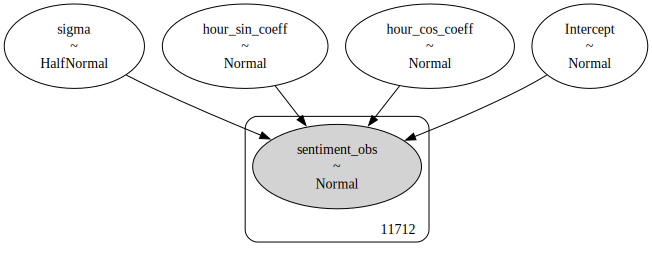

In [143]:
pm.model_to_graphviz(model)

array([[<Axes: title={'center': 'Intercept'}>,
        <Axes: title={'center': 'Intercept'}>],
       [<Axes: title={'center': 'hour_sin_coeff'}>,
        <Axes: title={'center': 'hour_sin_coeff'}>],
       [<Axes: title={'center': 'hour_cos_coeff'}>,
        <Axes: title={'center': 'hour_cos_coeff'}>],
       [<Axes: title={'center': 'sigma'}>,
        <Axes: title={'center': 'sigma'}>]], dtype=object)

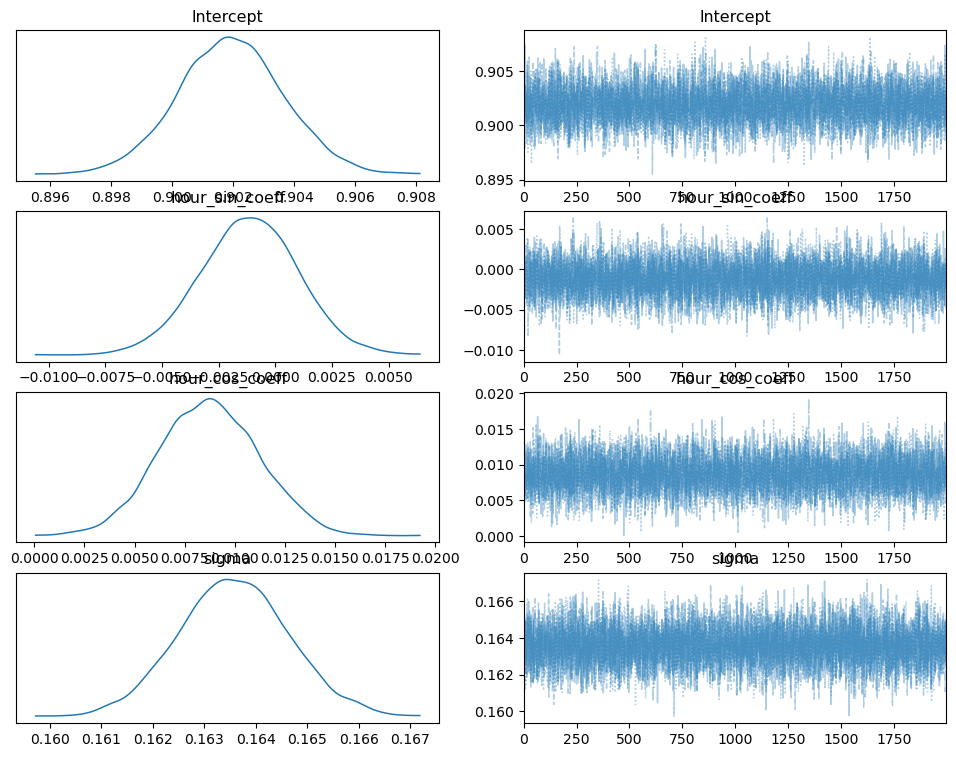

In [144]:
az.plot_trace(idata, figsize=(12, 9), combined=True)